<a href="https://colab.research.google.com/github/eashabibi/FML/blob/main/Univariate_on_Company_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
company=pd.read_csv('/content/drive/MyDrive/FML/Company.csv')

In [3]:
company.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
company.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
X=company['TV'].values
y=company['Sales'].values

In [7]:
X.shape,y.shape

((200,), (200,))

In [8]:
X=X.reshape(-1,1)
X.shape

(200, 1)

In [9]:
y=y.reshape(-1,1)
y.shape

(200, 1)

In [10]:
X.shape,y.shape

((200, 1), (200, 1))

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=101)

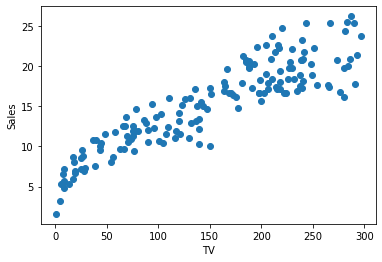

In [12]:
plt.scatter(X_train,y_train)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [14]:
reg.fit(X_train,y_train)

LinearRegression()

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
y_predict=reg.predict(X_train)
mae=mean_absolute_error(y_train,y_predict)
mse=mean_squared_error(y_train,y_predict)
rmse=np.sqrt(mean_squared_error(y_train,y_predict))
rs=r2_score(y_train,y_predict)
print("mae ",mae)
print("mse ",mse)
print("rmse ",rmse)
print("rs ",rs)

mae  1.8473223060765172
mse  5.234765531375338
rmse  2.2879609986569567
rs  0.813997555689372


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
y_predict_test=reg.predict(X_test)
mae=mean_absolute_error(y_test,y_predict_test)
mse=mean_squared_error(y_test,y_predict_test)
rmse=np.sqrt(mean_squared_error(y_test,y_predict_test))
rs=r2_score(y_test,y_predict_test)
print("mae ",mae)
print("mse ",mse)
print("rmse ",rmse)
print("rs ",rs)

mae  1.7706783806719155
mse  5.188919224826998
rmse  2.2779199338051805
rs  0.802044847713428


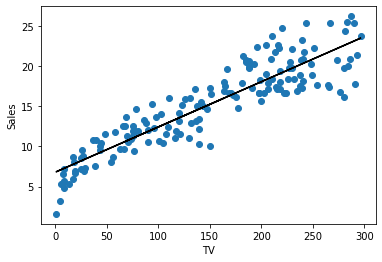

In [17]:
plt.scatter(X_train,y_train)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.plot(X_train,y_predict,color='black')
plt.show()